In [70]:
# Homework 6 Template
# G. Besla & R. Li

In [71]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams['figure.dpi'] = 1200
plt.rcParams['savefig.dpi'] = 1200
# Computer Modern with TeX
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass

In [72]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and
    vel as a function of time.
    
    inputs:
        galaxy : 'str'
            Name of the galaxy, e.g. "MW"
        start : 'int'
            First snapshot number to be read in
        end : 'int'
            Last snapshot number to be read in
        n : 'int'
            Interval between snapshots
          
    outputs: 
        no returns, but will write a .txt file with time, position, and velocity of CoM
    """
    
    fileout = "Orbit_" + galaxy + ".txt" # filename for output
    delta = 0.1 # Tolerance in kpc
    
    # Reduce radius by two for the MW and M31, but by 4 for M33 (stripped more)
    volDec = 2 * (1 + (galaxy == "M33"))
    
    # generate the snapshot id sequence 
    snap_ids = np.arange(start, end+1, n) # Making sure to include the end snapshot
    
    # print an error message and exit if snap_ids is empty
    if snap_ids.size == 0:
        print('Error: snap_ids array is empty.')
        exit()
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([snap_ids.size, 7]) # 7 cols for our 7 vars, rows for each snapshot
    
    # loop over files
    for i, snap_id in enumerate(snap_ids):
        
        # add a string of the filenumber to the value “000”
        ilbl = '000' + str(snap_id)
        # remove all but the last 3 digits
        ilbl = ilbl[-3:]
        # construct filename (making sure to end up in the right directory)
        filename = 'VLowRes_' + galaxy +'/' '%s_'%(galaxy) + ilbl + '.txt'
        
        # Initialize an instance of CenterOfMass class, using disk particles
        com = CenterOfMass(filename, 2)
        pos = com.COM_P(delta, volDec) # get CoM position
        vel = com.COM_V(pos[0], pos[1], pos[2]) # get CoM velocity
    
        # store the time, CoM pos, CoM vel in element i of the orbit arr, no units (.value) 
        orbit[i] = com.time.value / 1_000, *pos.value, *vel.value 
        print(snap_id) # print snap_id to see the progress
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

## Testing:

In [73]:
# OrbitCOM("MW", 0, 10, 1) # Try out OrbitCOM for 11 snapshots (n = 1)

**This appears to work!**

# 3 &nbsp; Plotting

## 1.

In [74]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5 
OrbitCOM("MW", 0, 800, 5)
OrbitCOM("M31", 0, 800, 5)
OrbitCOM("M33", 0, 800, 5)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495


## 2.

In [75]:
# Read in the data files for the orbits of each galaxy
# headers:  t, x, y, z, vx, vy, vz
MW_data = np.genfromtxt("Orbit_MW.txt", dtype=None, names=True)
M31_data = np.genfromtxt("Orbit_M31.txt", dtype=None, names=True)
M33_data = np.genfromtxt("Orbit_M33.txt", dtype=None, names=True)

**More testing:**

In [78]:
# print(MW_data['x']) # x-values match with the generated .txt file 👍

## 3.

In [80]:
# function to compute the magnitude of the difference between two vectors 
# can use to return both the relative position and relative velocity for two galaxies  
def v_sep(vec1, vec2):
    """
    Purpose: takes two vectors of equal dimension and returns the magnitude of their
    difference.
    
    Inputs:
        vec1 : 'numpy array'
            First vector to be considered in the difference
        vec2 : 'numpy array'
            Second vector to be considered in the difference
    
    Returns:
        diff_mag : 'float'
            Magnitude of the difference between vec1 and vec2
    """
    
    diff_vec = vec1 - vec2 # Calculate vector difference
    # Calculate the magnitude of the difference vector
    diff_mag = np.sqrt(np.sum([diff_i**2 for diff_i in diff_vec]))
    
    # Return the result
    return diff_mag

**Testing:**

In [84]:
# v1 = np.array([0, 1, 5])
# v2 = np.array([6, 1, 1])

# print(v_sep(v1, v2))

In [85]:
# Get MW, M31, and M33 positions
MW_p = np.array( [MW_data['x'], MW_data['y'], MW_data['z']] )
M31_p = np.array( [M31_data['x'], M31_data['y'], M31_data['z']] )
M33_p = np.array( [M33_data['x'], M33_data['y'], M33_data['z']] )

# Get MW, M31, and M33 velocities
MW_v = np.array( [MW_data['vx'], MW_data['vy'], MW_data['vz']] )
M31_v = np.array( [M31_data['vx'], M31_data['vy'], M31_data['vz']] )
M33_v = np.array( [M33_data['vx'], M33_data['vy'], M33_data['vz']] )

times = MW_data['t'] # times in Gyr (x-axis)
n_t = len(times) # Number of points we'll plot

# Separation between the MW and M31
MW_M31_sep = np.array([v_sep(MW_p[:, i], M31_p[:, i]) for i in range(n_t)])

# Separation between M31 and M33
M31_M33_sep = np.array([v_sep(M31_p[:, i], M33_p[:, i]) for i in range(n_t)])

# Relative speed between the MW and M31
MW_M31_speed = np.array([v_sep(MW_v[:, i], M31_v[:, i]) for i in range(n_t)])

# Relative speed between M31 and M33
M31_M33_speed = np.array([v_sep(M31_v[:, i], M33_v[:, i]) for i in range(n_t)])

## 4.

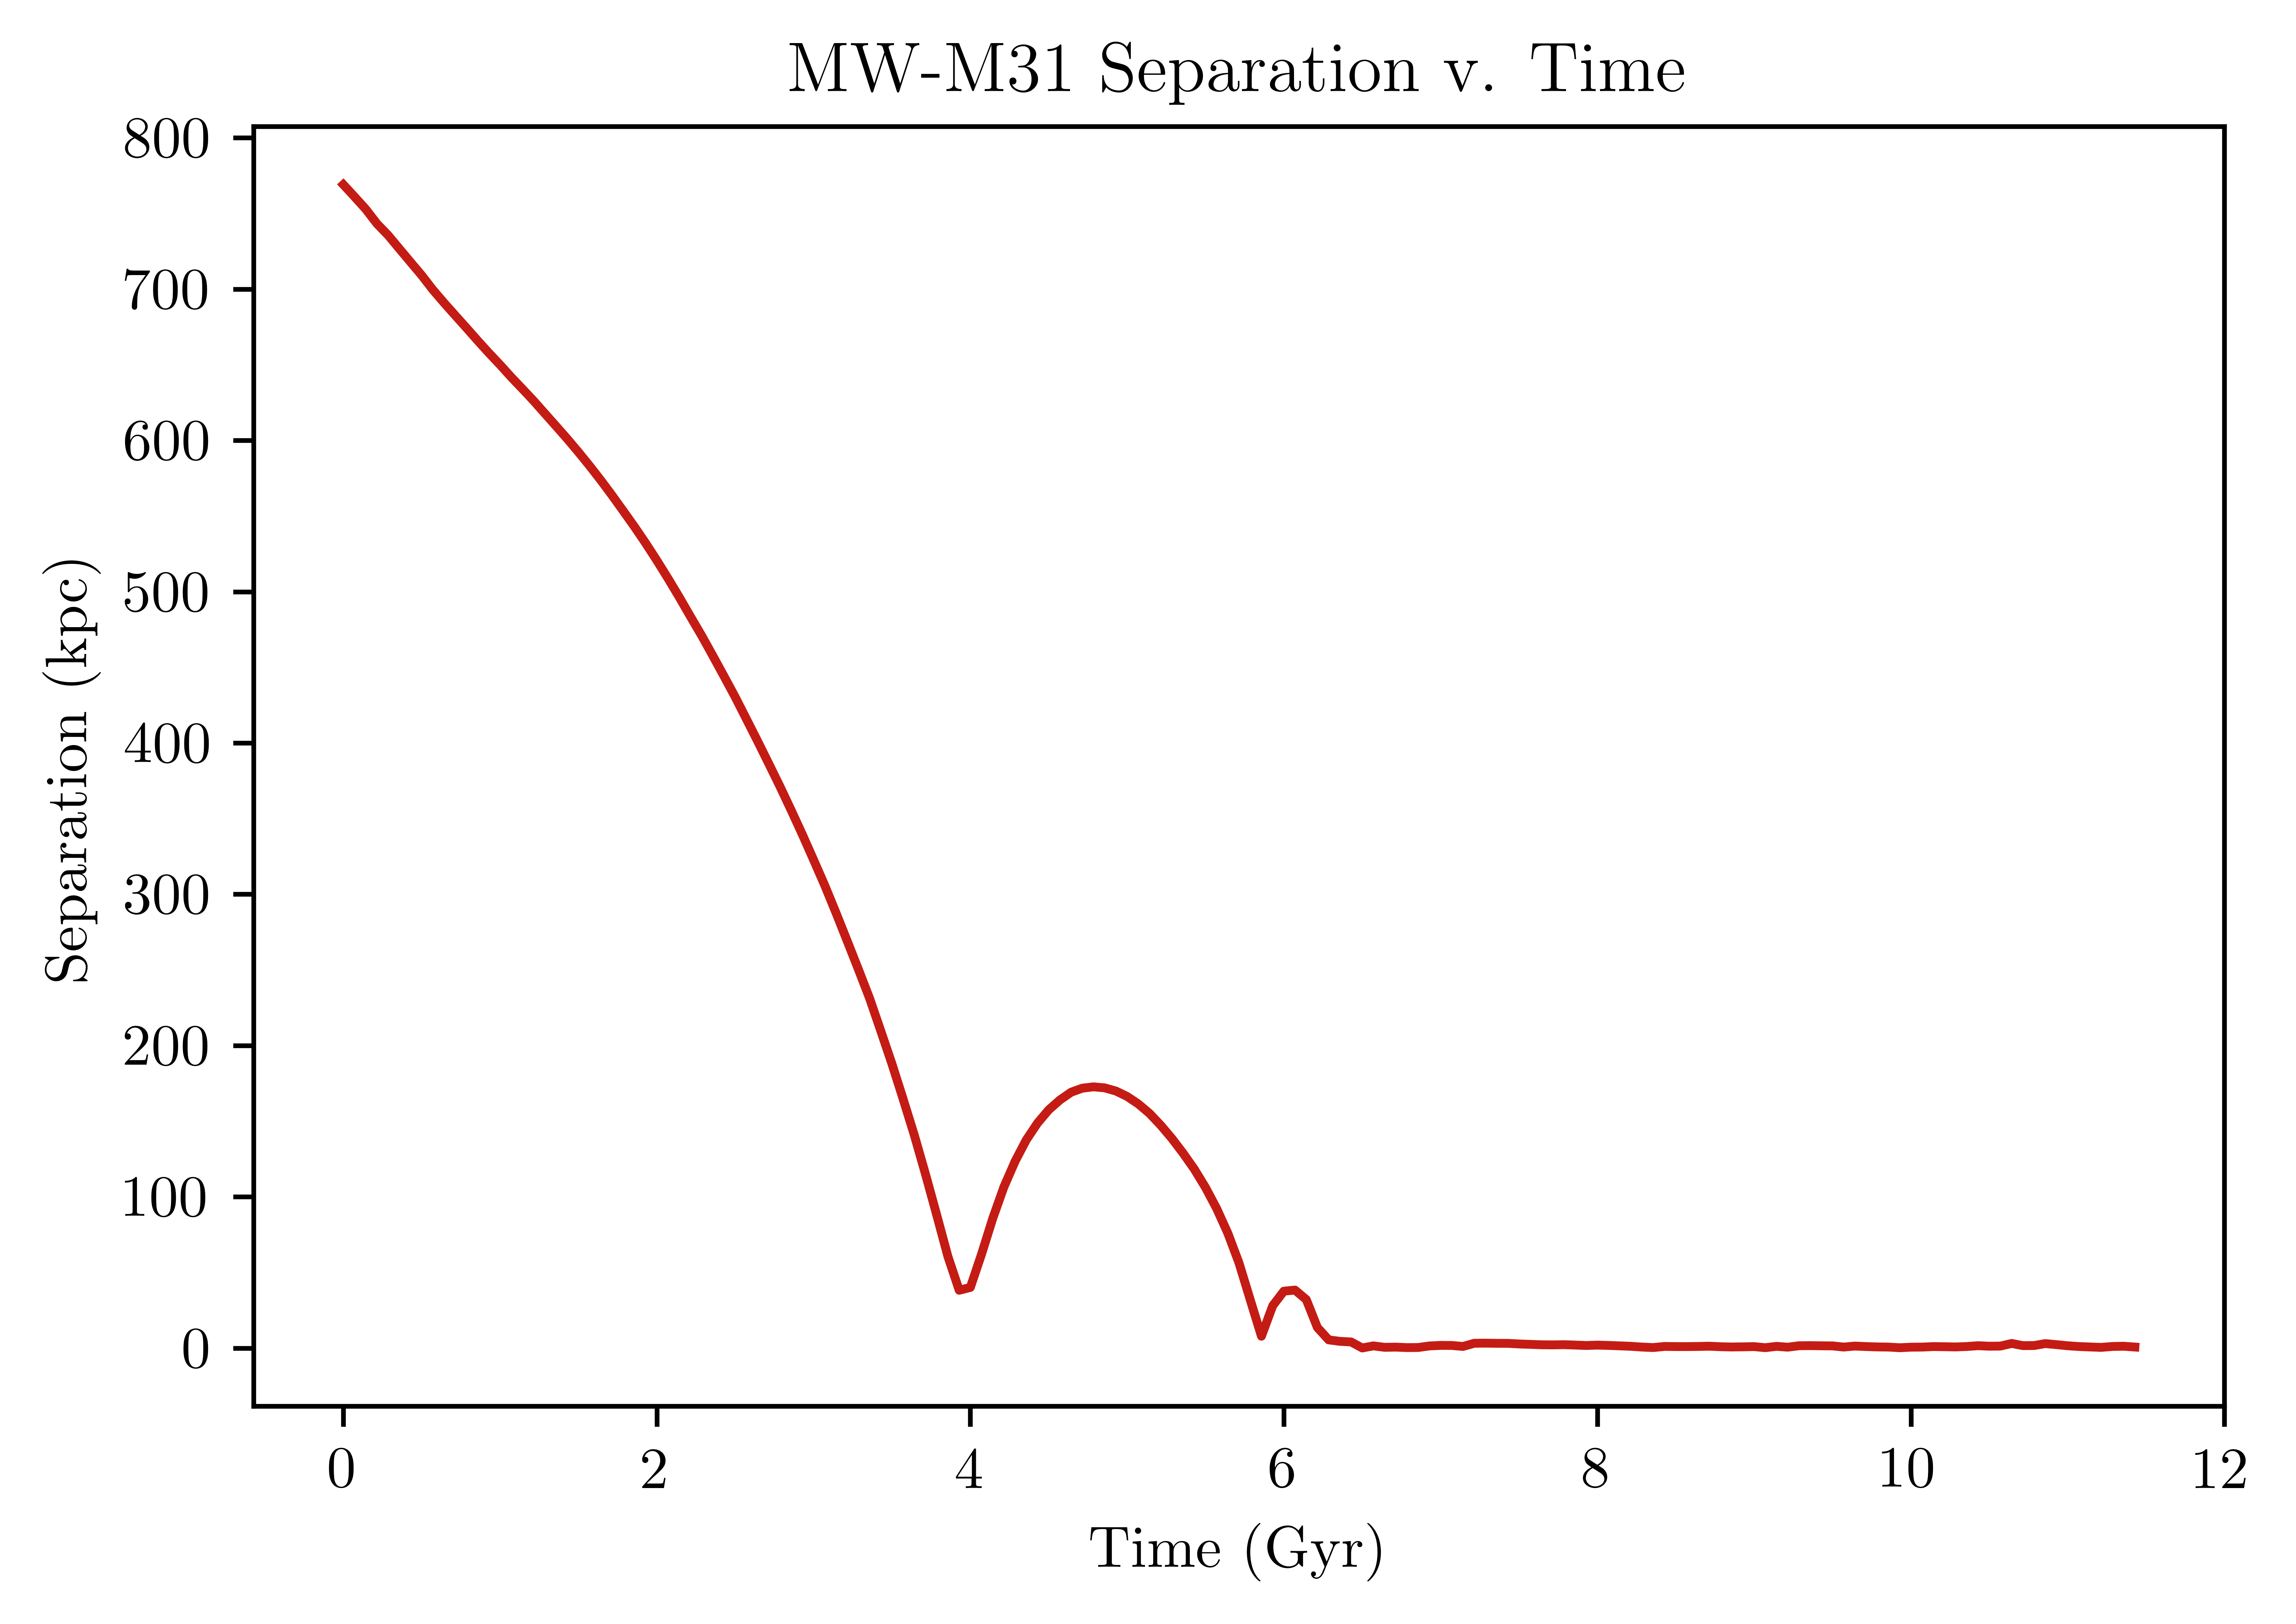

In [87]:
# setup
fig, ax = plt.subplots()

# Labels and title
ax.set(xlabel='Time (Gyr)', ylabel='Separation (kpc)',
       title='MW-M31 Separation v. Time')

# Plot MW-M31 separation over simulation time
ax.plot(times, MW_M31_sep, color=(196/255, 28/255, 20/255))

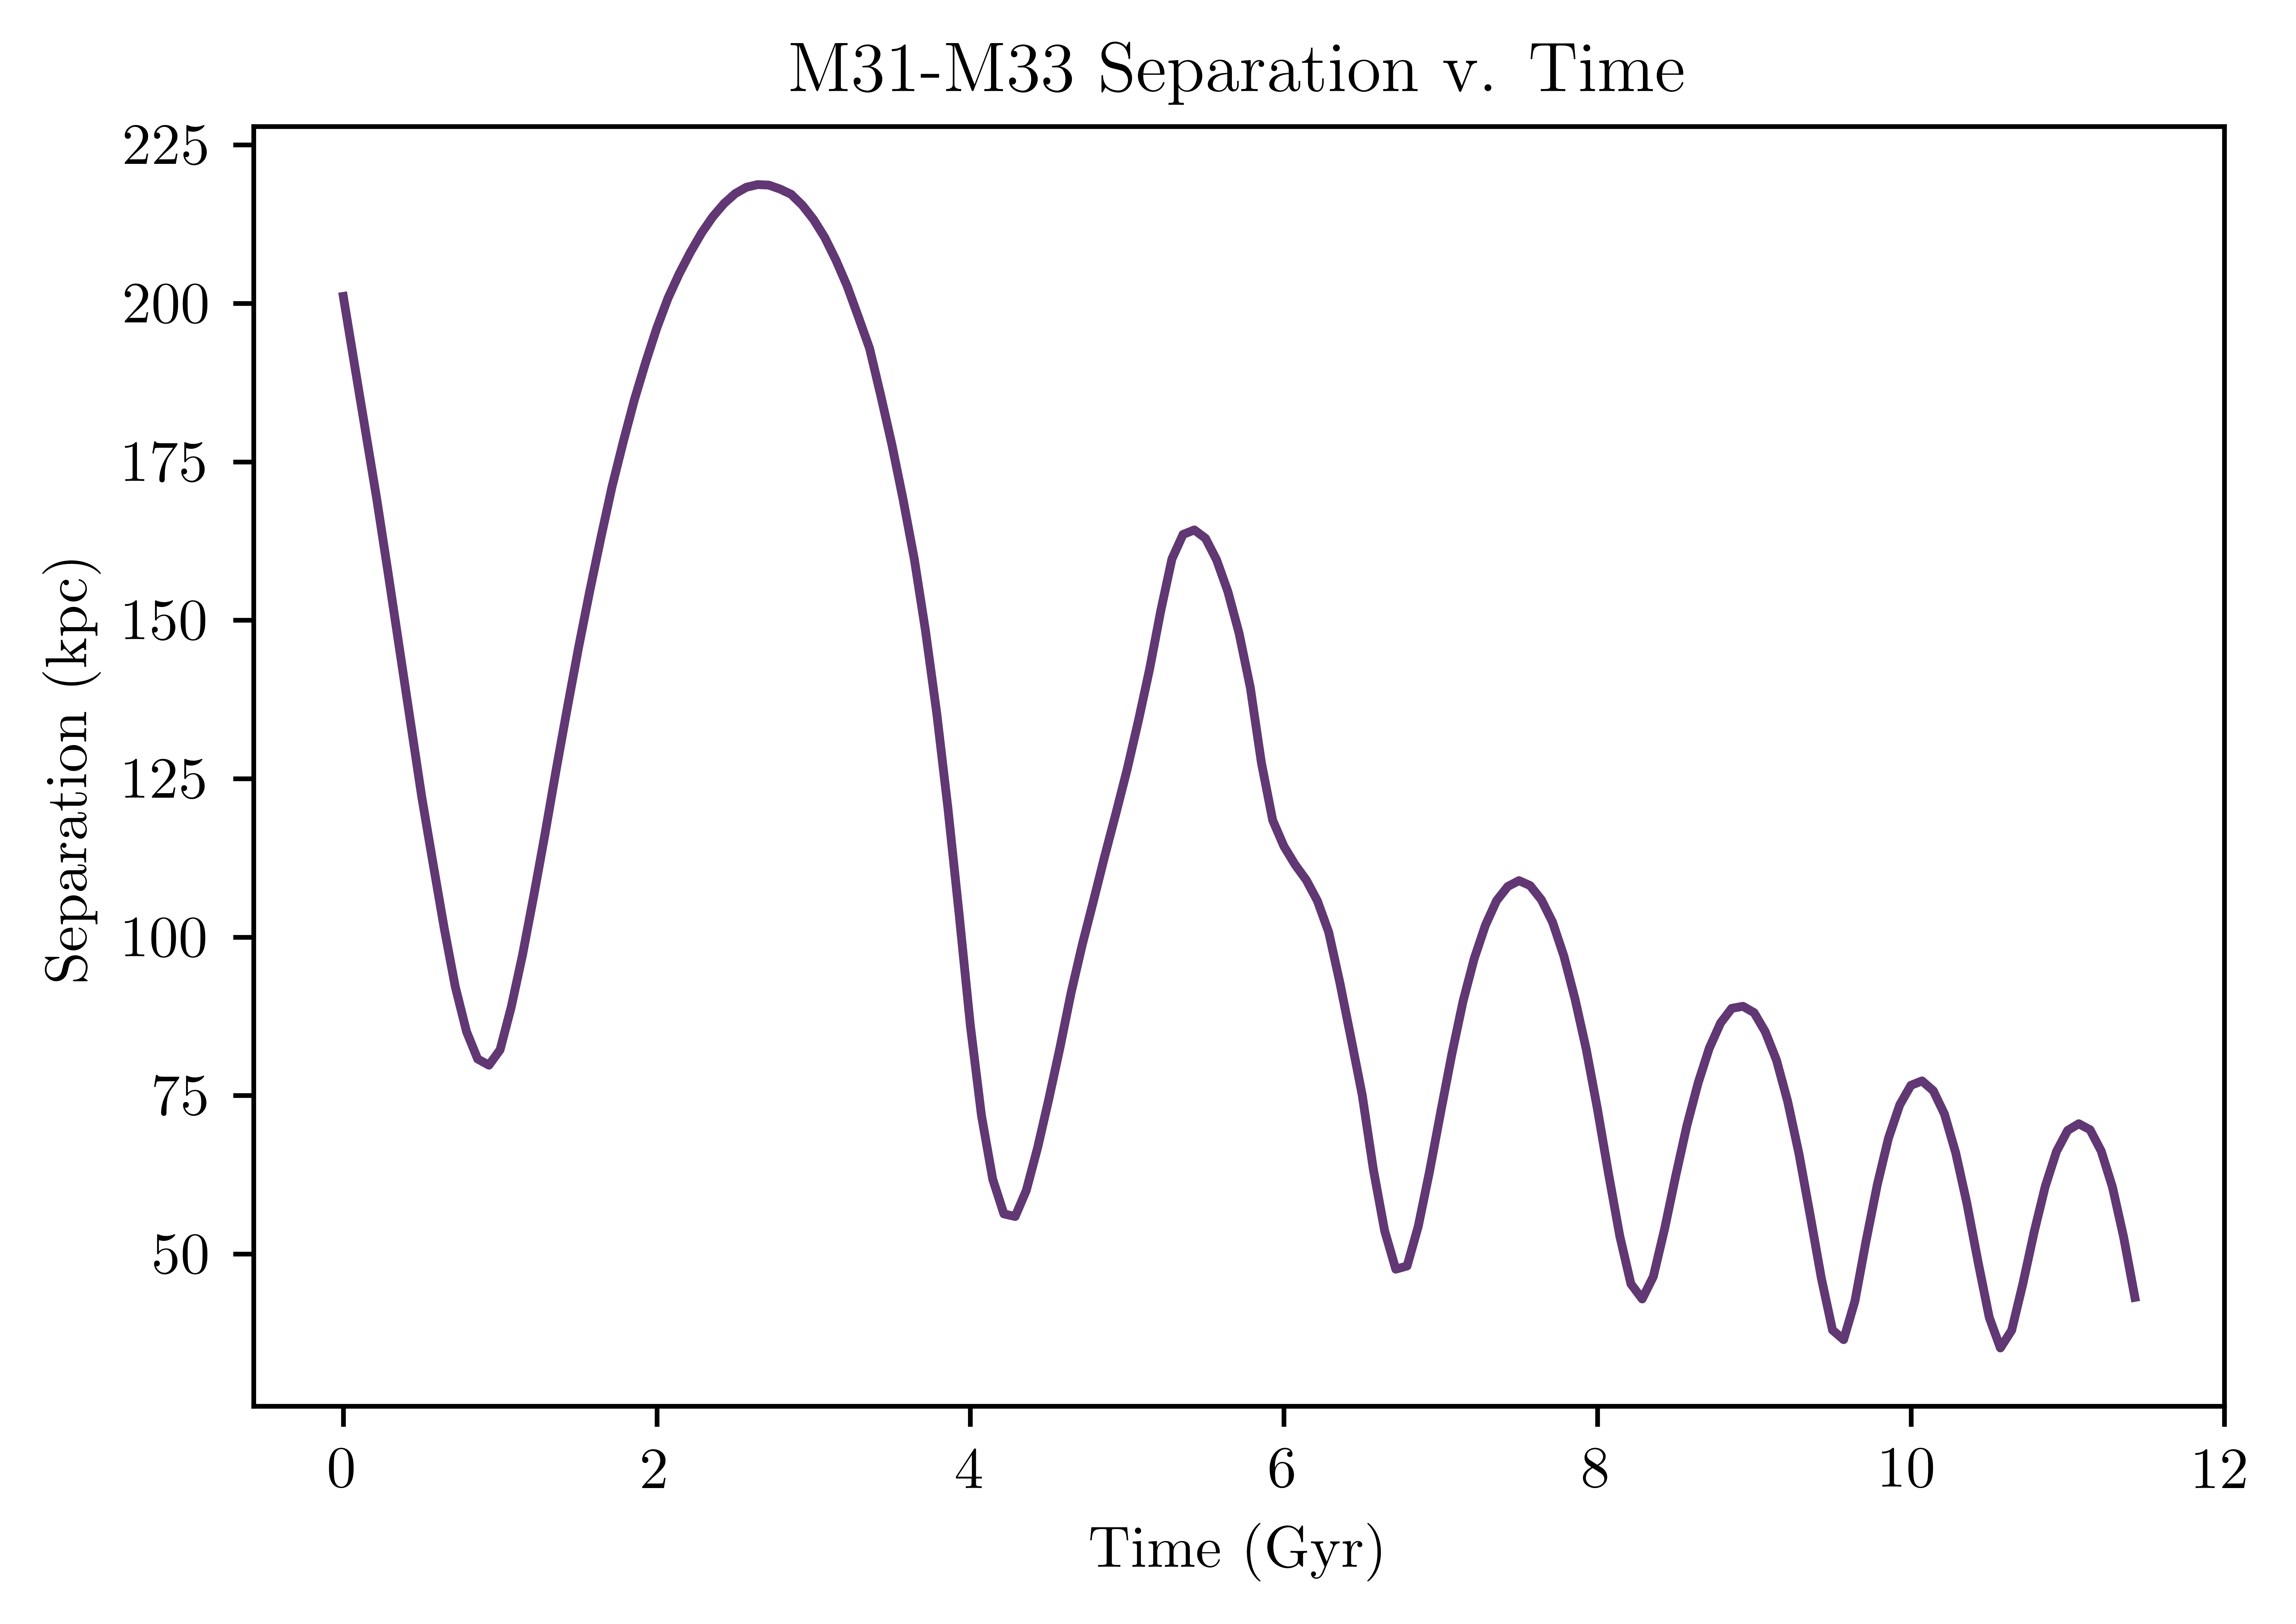

In [89]:
# setup
fig, ax = plt.subplots()

# labels and title
ax.set(xlabel='Time (Gyr)', ylabel='Separation (kpc)',
       title='M31-M33 Separation v. Time')

# plot M31-M33 separation over simulation time
ax.plot(times, M31_M33_sep, color=(97/255, 56/255, 116/255))

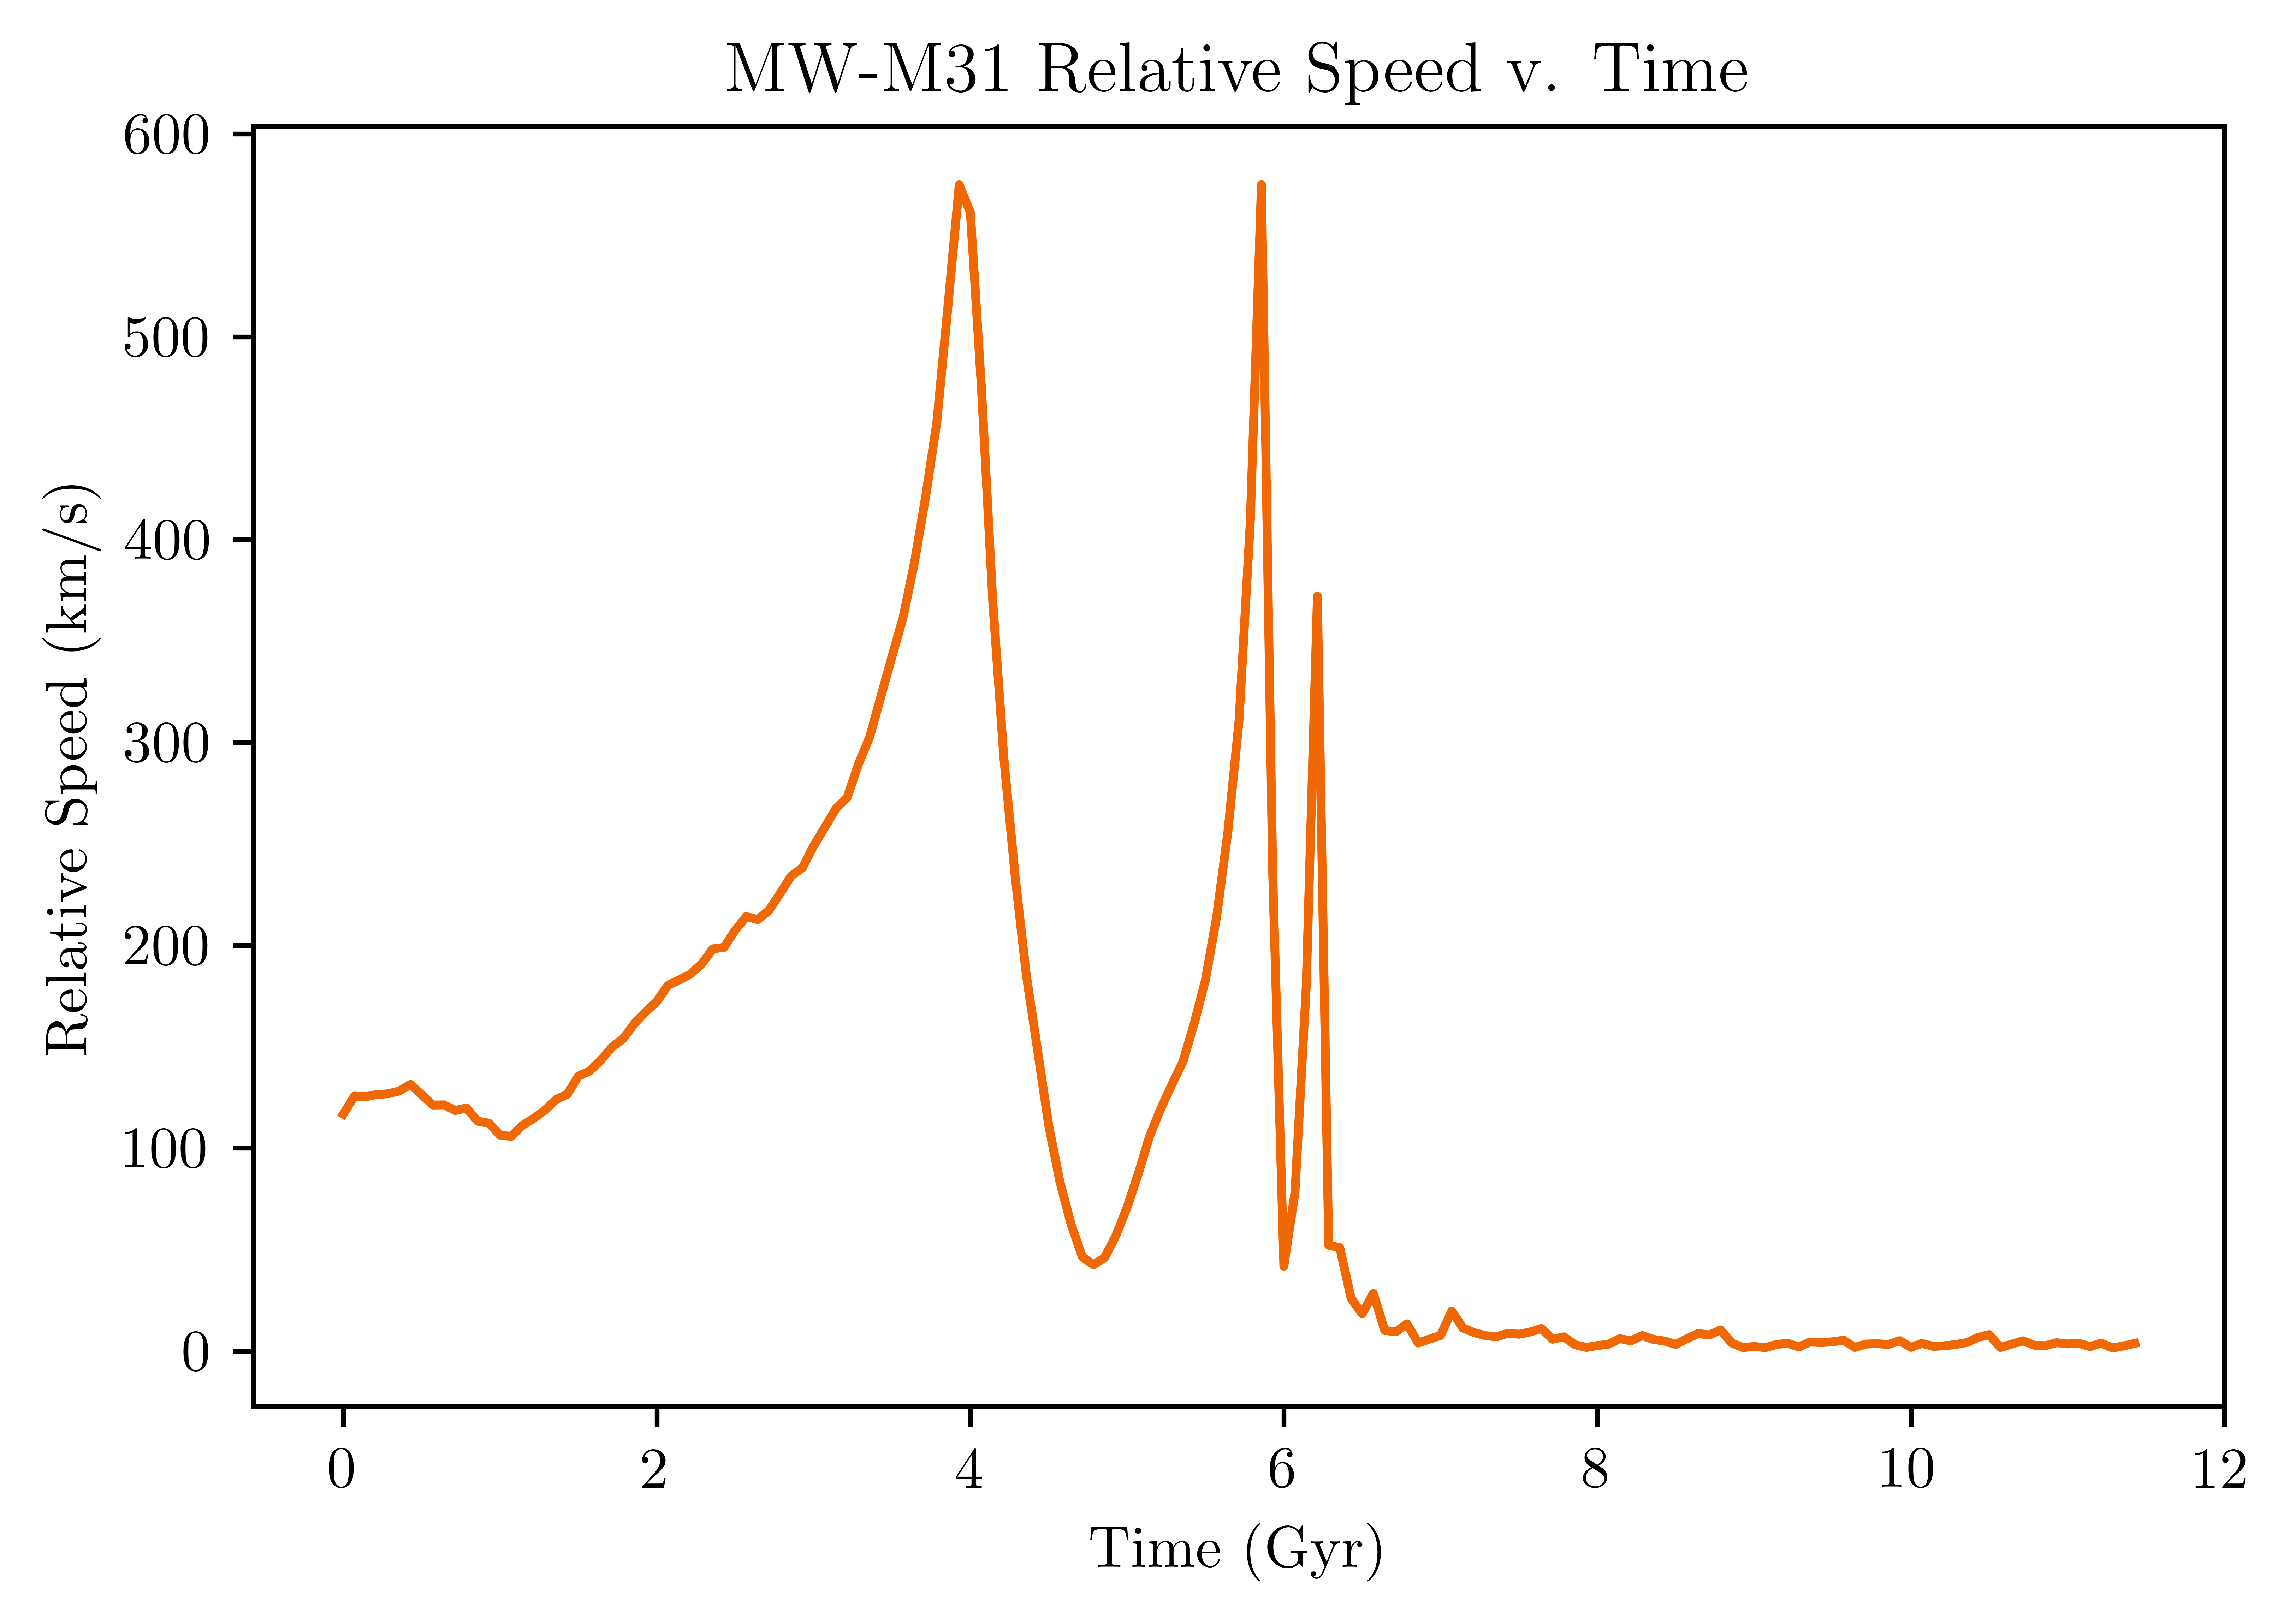

In [91]:
# setup
fig, ax = plt.subplots()

# labels and title
ax.set(xlabel='Time (Gyr)', ylabel='Relative Speed (km/s)',
       title='MW-M31 Relative Speed v. Time')

# plot MW-M31 relative speed over simulation time
ax.plot(times, MW_M31_speed, color=(239/255, 104/255, 4/255))

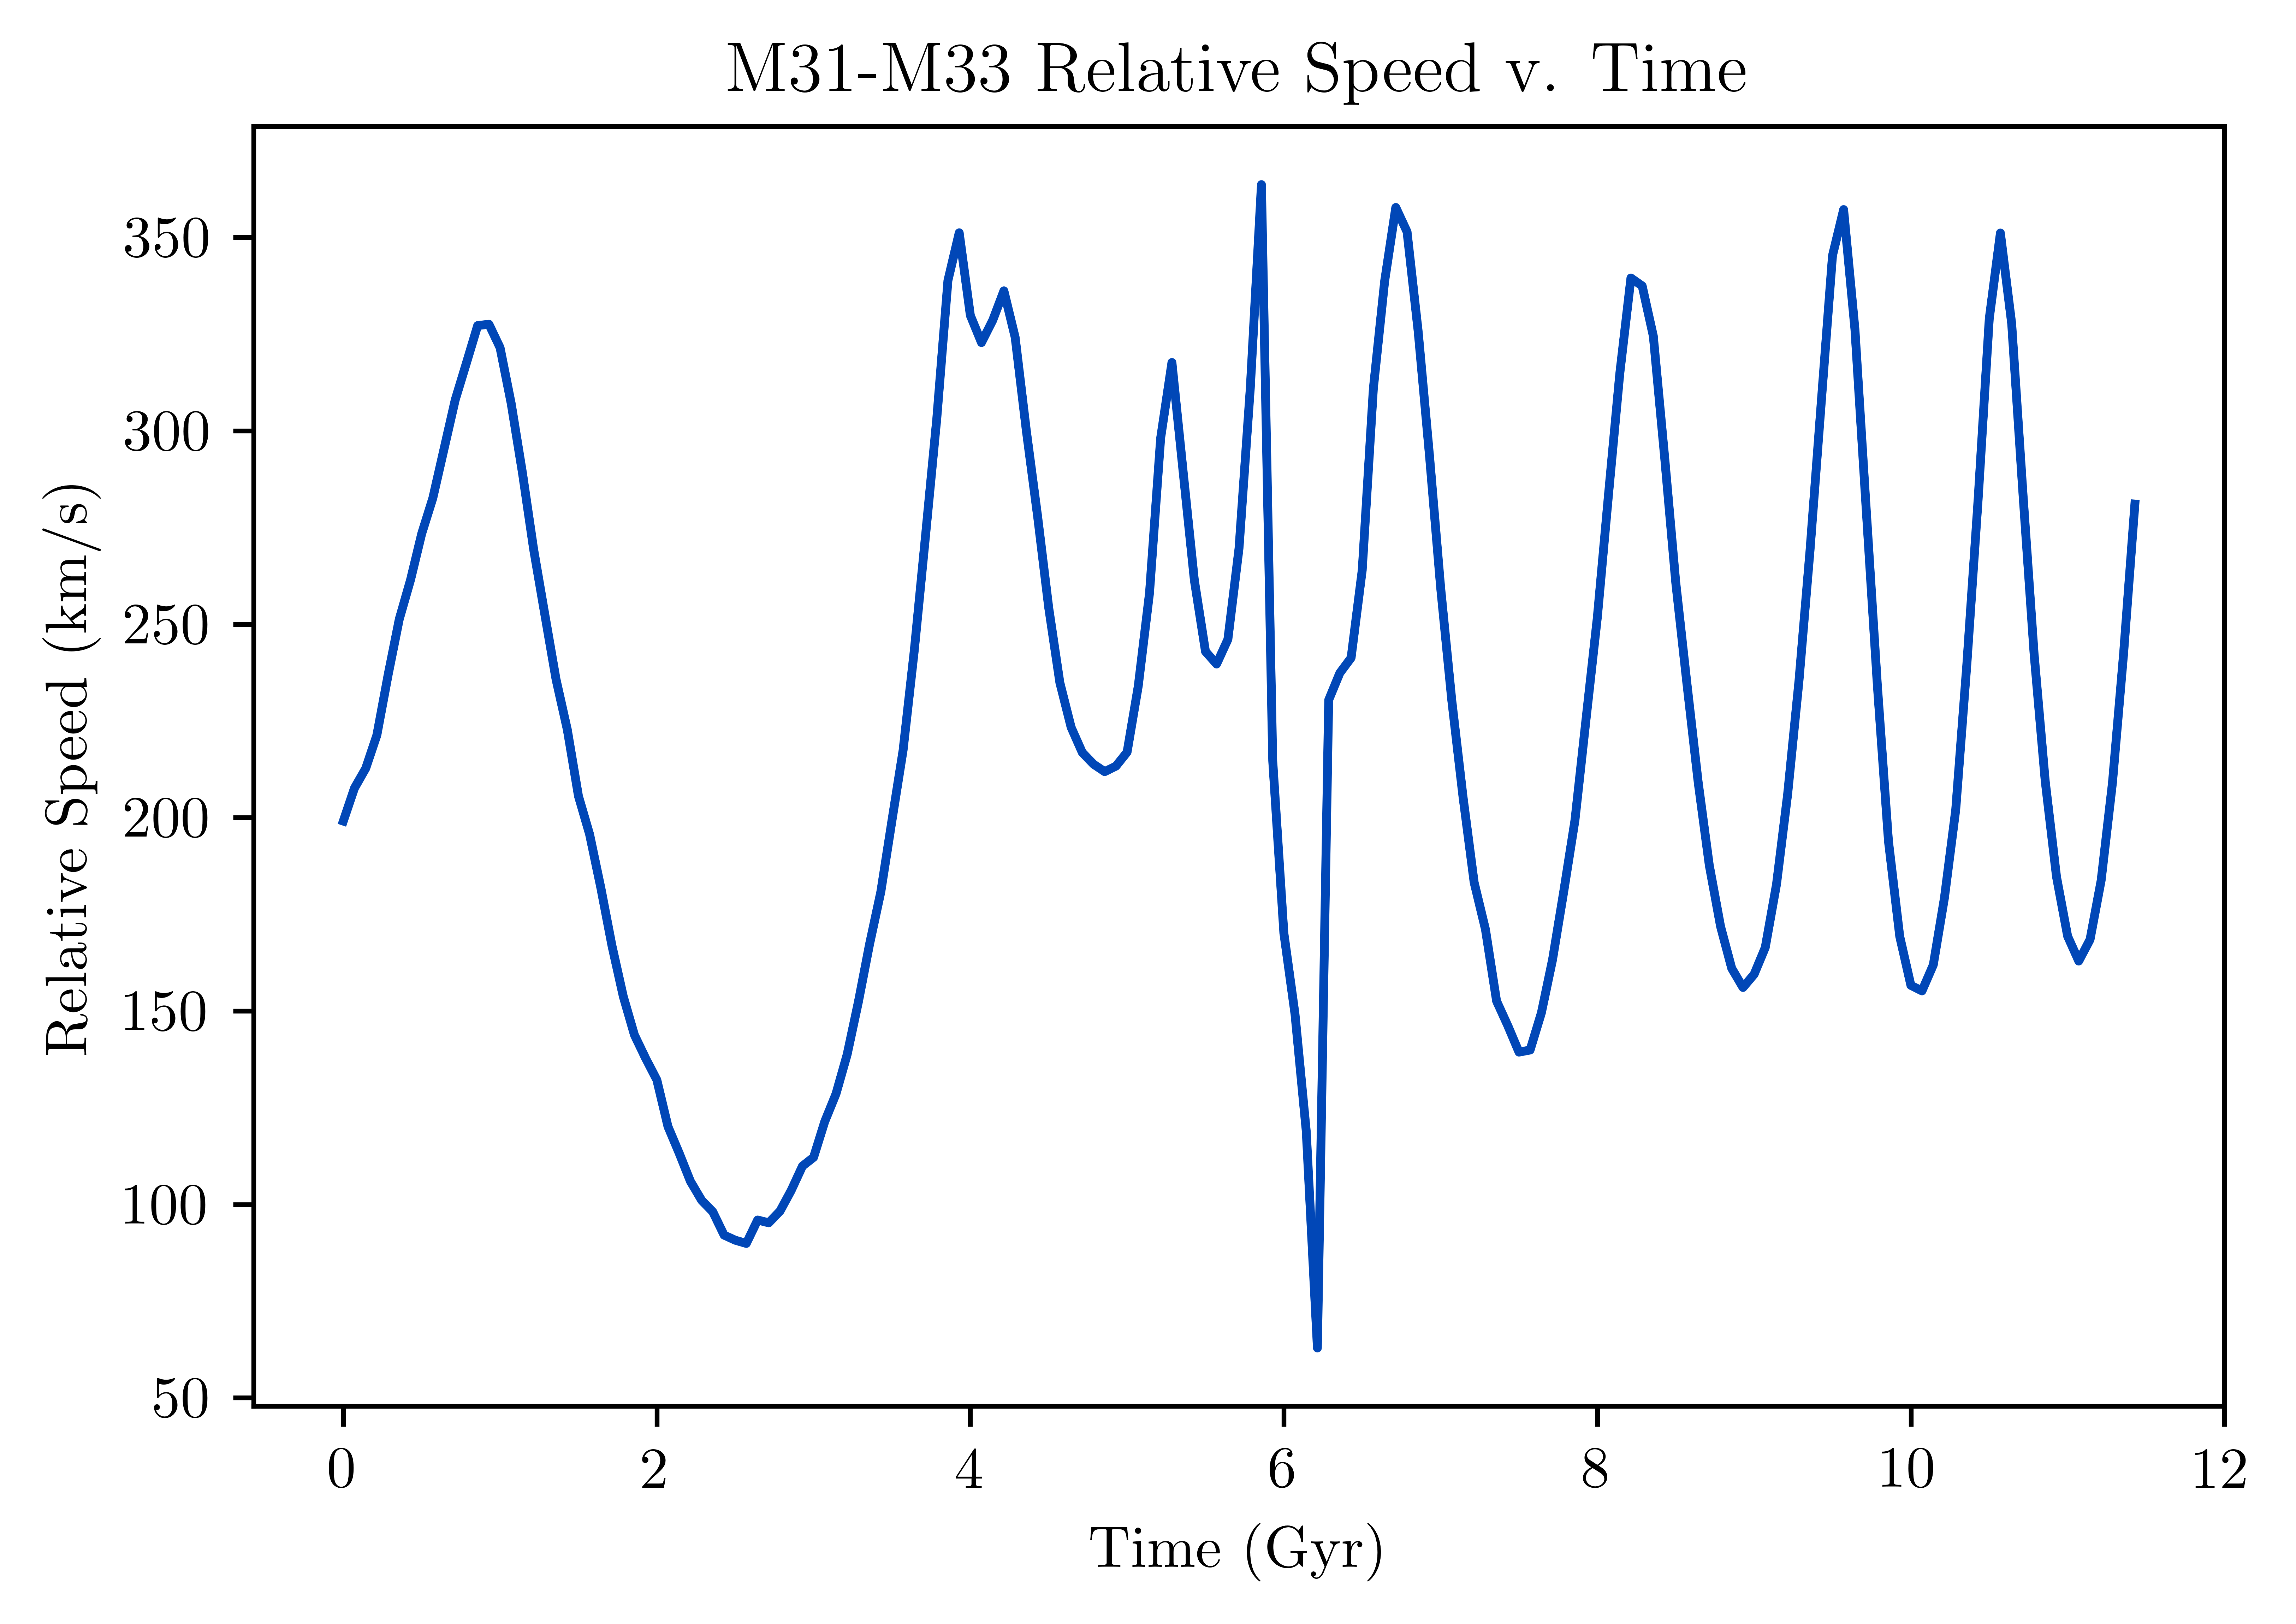

In [92]:
# setup
fig, ax = plt.subplots()

# labels, title
ax.set(xlabel='Time (Gyr)', ylabel='Relative Speed (km/s)',
       title='M31-M33 Relative Speed v. Time')

# plot M31-M33 relative speed over simulation time
ax.plot(times, M31_M33_speed, color=(1/255, 71/255, 183/255))